# Math 775 Project
## Gauree Wathodkar

This is a time series analysis project. 

Here we will import a Walmart stock data and extract values for last 25 years and will take its average along all quarters of years.

Then we will take log quarter data and will plot autocorrelation function. Using Augumented Dickey Fuller Test (ADF test) we will check if time series is stationary or not.

If time series is not stationary, we will calculate its first and second difference and their ACF.

Then we will try to fit some arima model by autoarima function.

Finally, we will check its diagnostics.

To start this project we will install some packages first

In [16]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt


In [35]:
!pip install pmdarima
import pmdarima as pm
from pmdarima.arima import auto_arima

We have downloaded the data in .csv format, we will import it

In [5]:
data = pd.read_csv(r'/home/gauree/Downloads/WMT.csv')   
print(data)

             Date        Open        High         Low       Close   Adj Close  \
0      1972-08-25    0.063477    0.064697    0.063477    0.064453    0.036447   
1      1972-08-28    0.064453    0.064941    0.064209    0.064209    0.036309   
2      1972-08-29    0.063965    0.063965    0.063477    0.063477    0.035895   
3      1972-08-30    0.063477    0.063477    0.062988    0.063477    0.035895   
4      1972-08-31    0.062988    0.062988    0.062500    0.062500    0.035343   
...           ...         ...         ...         ...         ...         ...   
12486  2022-03-02  135.660004  136.830002  135.179993  136.160004  136.160004   
12487  2022-03-03  137.289993  140.470001  136.550003  139.289993  139.289993   
12488  2022-03-04  137.809998  142.940002  137.589996  142.820007  142.820007   
12489  2022-03-07  141.300003  143.630005  140.449997  141.669998  141.669998   
12490  2022-03-07  141.300003  143.630005  140.449997  141.669998  141.669998   

         Volume  
0       2

This data has many columns. We will only choose the dates and Closing value of stocks

In [6]:
df = pd.DataFrame(data, columns=['Date', 'Close'])
print(df)

             Date       Close
0      1972-08-25    0.064453
1      1972-08-28    0.064209
2      1972-08-29    0.063477
3      1972-08-30    0.063477
4      1972-08-31    0.062500
...           ...         ...
12486  2022-03-02  136.160004
12487  2022-03-03  139.289993
12488  2022-03-04  142.820007
12489  2022-03-07  141.669998
12490  2022-03-07  141.669998

[12491 rows x 2 columns]


Here the data has starting year 1972, we will restrict our data to values from 6490th entry to 12490th entry. In order to get 6000 data points.

In [8]:
startind=6490
endind = 12490
date=df['Date'][startind:endind]
price=df['Close'][startind:endind]
print(price)

6490      25.250000
6491      24.968750
6492      25.312500
6493      25.250000
6494      25.562500
            ...    
12485    135.990005
12486    136.160004
12487    139.289993
12488    142.820007
12489    141.669998
Name: Close, Length: 6000, dtype: float64


In order to get Averages, we take average of each 60 data points. So that we get 100 data points for 25 year quarterly data.

In [10]:
interval=60
price=np.array(price)
price_avg=price.reshape(int(len(price)/interval),interval)
price_avg=np.mean(price_avg,axis=1)
print(price_avg)

[ 29.44010417  31.078125    37.54270833  45.16510417  45.68229167
  45.97395833  59.07578125  56.1125      56.759375    54.49192708
  48.03020833  52.24000005  50.93433332  51.46033313  51.82800022
  57.84766647  59.14749985  52.55783303  53.69733333  50.7841666
  52.06633377  54.78533338  58.17866653  54.3761666   58.10549977
  54.98033332  53.11066682  53.80866652  52.2553335   48.00416655
  47.51199993  46.9610001   46.00983367  47.08616682  45.44299997
  48.32366653  47.54166675  47.62716657  47.62600013  44.32349998
  48.04216715  53.38733347  57.51166673  57.80266652  53.8546668
  49.74383325  49.21999995  50.26550025  52.88516678  54.22616698
  52.196667    51.26000007  54.18133335  54.235       53.87049985
  52.58049985  55.26450002  59.96383327  60.4800001   70.61866682
  73.87033332  69.75099975  75.28816683  76.52616665  74.62100075
  78.1911669   75.54466652  76.80283347  75.82566643  82.578
  84.33399992  75.84166652  68.72850073  60.18399998  65.16066668
  68.91916672  72

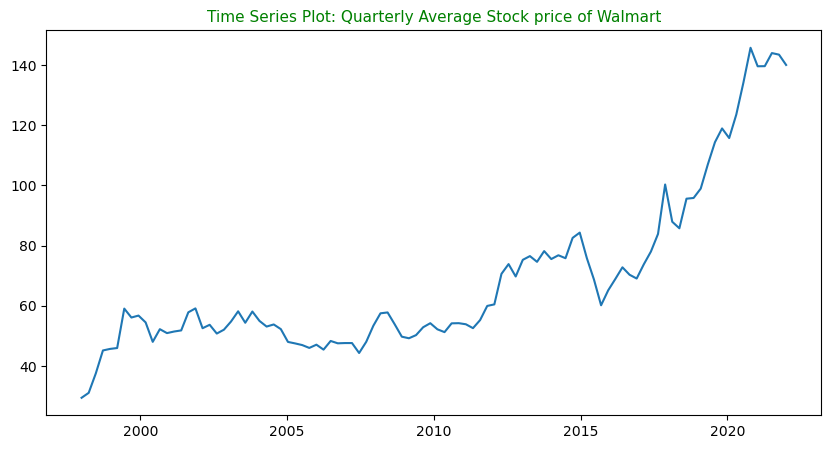

In [11]:
x=np.linspace(1998,2022,100)
f=plt.figure(figsize=(10,5))
plt.plot(x,price_avg)

plt.title("Time Series Plot: Quarterly Average Stock price of Walmart",fontsize=11,
          color="green")
plt.show()

Now we calculate the log of quarterly average.

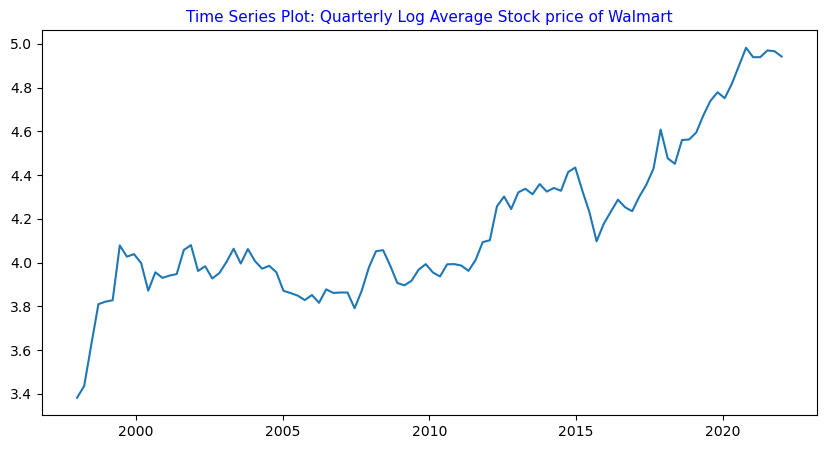

In [12]:
log_pr_avg=np.log(price_avg)
f=plt.figure(figsize=(10,5))
plt.plot(x,log_pr_avg)
plt.title("Time Series Plot: Quarterly Log Average Stock price of Walmart",fontsize=11,
          color="blue")
plt.show()

To check if time series is stationary we will use ADF Test.

In [13]:
# ADF Test
series = price_avg
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    

ADF Statistic: 0.5729306313047952
n_lags: 0.9869290594006136
p-value: 0.9869290594006136
Critial Values:
   1%, -3.498198082189098
Critial Values:
   5%, -2.891208211860468
Critial Values:
   10%, -2.5825959973472097


The p-value is obtained is greater than significance level of 0.05 and the ADF statistic is higher than any of the critical values.

Clearly, there is no reason to reject the null hypothesis. So, the time series is in fact non-stationary.

We will draw the ACF plot of the time series.

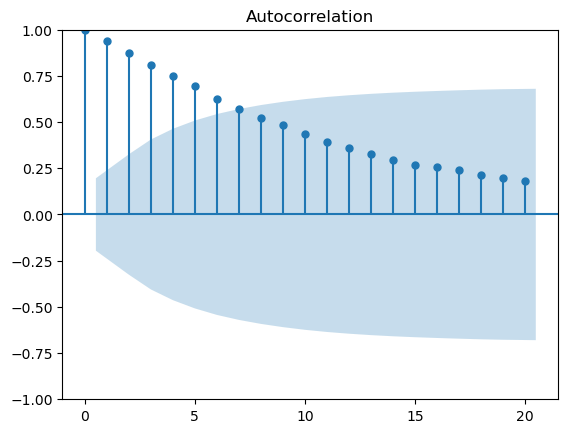

In [19]:
#plot autocorrelation function
fig = tsaplots.plot_acf(price_avg)
plt.show()

the autocorrelations decay slowly. This also confirms that, the data is not stationary as the the spikes of the ACF plot are over the threshold region shown in blue.

We will plot the first and second differences of the series.

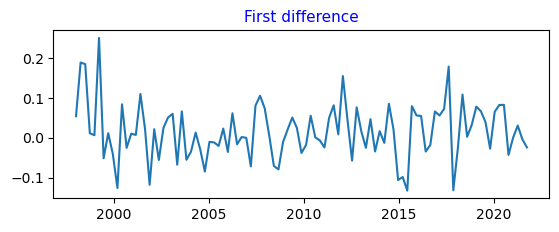

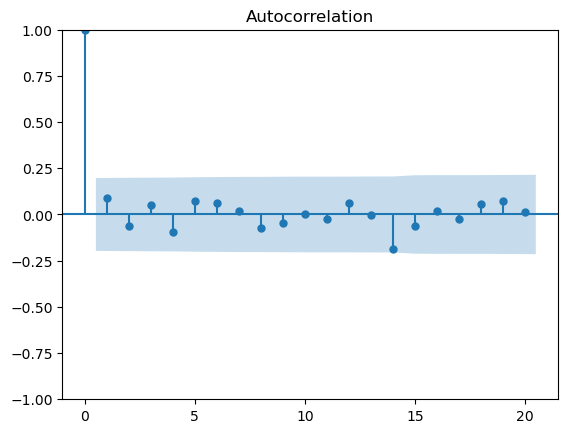

In [32]:
original = np.log(price_avg)
first_diff = np.diff(original)
second_diff = np.diff(np.diff(original))

y=x[:-1]
plt.subplot(2, 1, 1)
plt.plot(y,first_diff)
plt.title("First difference",fontsize=11,
          color="blue")


plot_acf(first_diff)
plt.show()


As we can see, the acf plot of the first difference suggests that the difference is mean reverting.

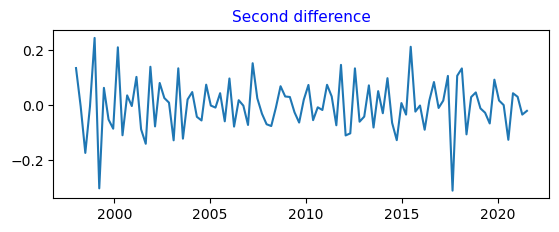

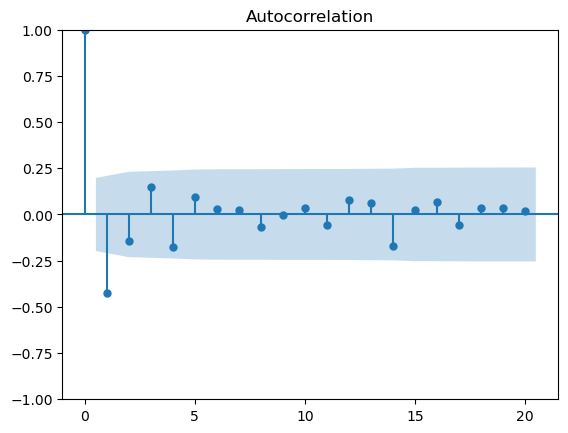

In [33]:
z=y[:-1]
plt.subplot(2, 1, 1)
plt.plot(z,second_diff)
plt.title("Second difference",fontsize=11,
          color="blue")


plot_acf(second_diff)
plt.show()


And clearly, both first and second differences are stationary. But it looks like it is over differenced.

We try to fit ARIMA model in this data.

In [38]:
train=log_pr_avg[:85]
test=log_pr_avg[-20:]

In [39]:
arima_model= auto_arima(train,start_p=0,d=1,start_q=0,max_p=5,max_d=5,max_q=5,start_P=0,D=1,start_Q=0,max_P=5,max_D=5,max_Q=5,m=12,seasonal=True,error_action='warn',trace=True,supress_warnings=True,stepwise=True,random_state=20,n_fits=99)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-138.997, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-143.431, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-145.820, Time=0.10 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-138.060, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=-143.911, Time=0.15 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=-143.934, Time=0.23 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-143.306, Time=0.07 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=0.44 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=-146.401, Time=0.04 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=-144.644, Time=0.10 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=-144.723, Time=0.12 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-143.410, Time=0.04 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=0.38 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=-145.880, Time=0.07 sec
 ARIMA(1,1,1)(0,1,1)[12]     

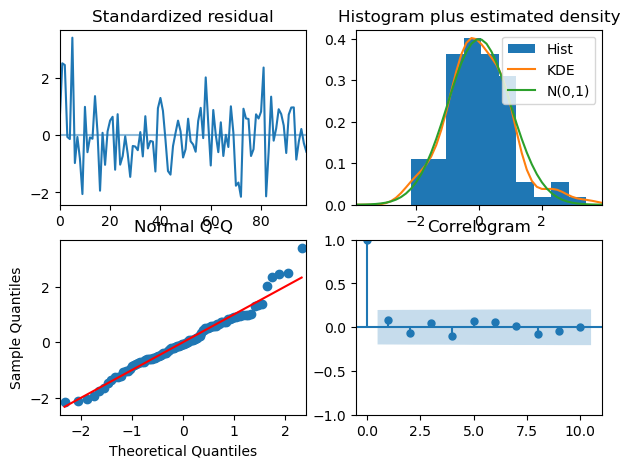

In [40]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

From here we can see that ARIMA(0,1,0)(0,1,1)[12] is the best model for given data of Walmart stock prices.